In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
trainds=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
testds=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

In [5]:
trainds.sample()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
52558,2,0,0,0,0,0,0,0,1,2,...,0,0,0,84,175,69,0,0,0,0


In [6]:
xtrain=trainds.drop('label',axis=1).values
xtrain=np.array([x.reshape((28,28)) for x in xtrain])
#xtrain=xtrain.reshape(28,28)
#xtrain=xtrain/255
ytrain=trainds['label'].values
xtest=testds.drop('label',axis=1).values#.reshape(-1,28*28)//255
xtest=np.array([x.reshape((28,28)) for x in xtest])
ytest=testds['label'].values
#y=np.array(xtrain.iloc[1:]).reshape(-1,28*28)//255
import matplotlib.pyplot as plt
#plt.imshow(y.reshape(28,28),cmap='gray')
#y=np.array(trainds.iloc[47:,0:-1]).reshape(28,28)
ytrain=pd.get_dummies(ytrain)
ytest=pd.get_dummies(ytest)

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten, Dense, Input, Dropout

2024-03-03 14:26:56.151945: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 14:26:56.152093: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 14:26:56.324899: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [8]:
model=Sequential()
model.add(Conv2D(30,(5,5),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(25,(5,5),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
histr=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.6999 - loss: 1.2467 - val_accuracy: 0.8638 - val_loss: 0.3660
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.8533 - loss: 0.4044 - val_accuracy: 0.8889 - val_loss: 0.3026
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.8699 - loss: 0.3524 - val_accuracy: 0.8887 - val_loss: 0.3059


In [10]:
histr=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.8827 - loss: 0.3210 - val_accuracy: 0.8942 - val_loss: 0.2785
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.8858 - loss: 0.3092 - val_accuracy: 0.8939 - val_loss: 0.2875
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.8931 - loss: 0.2861 - val_accuracy: 0.8942 - val_loss: 0.2901


could be trained for more number of epochs for better results 
sunce these images are more complex compared to the handqritten images dataset the accuracy might not be as much as those

In [11]:
histr=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.8996 - loss: 0.2750 - val_accuracy: 0.9022 - val_loss: 0.2738
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9003 - loss: 0.2639 - val_accuracy: 0.9017 - val_loss: 0.2739
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9031 - loss: 0.2568 - val_accuracy: 0.8995 - val_loss: 0.2829


In [13]:
histr=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9124 - loss: 0.2427 - val_accuracy: 0.9035 - val_loss: 0.2877
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9107 - loss: 0.2396 - val_accuracy: 0.9057 - val_loss: 0.2796
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9127 - loss: 0.2325 - val_accuracy: 0.9047 - val_loss: 0.2811
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9149 - loss: 0.2238 - val_accuracy: 0.9037 - val_loss: 0.2809
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9167 - loss: 0.2259 - val_accuracy: 0.9025 - val_loss: 0.2907
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9174 - loss: 0.2178 - val_accuracy: 0.9001 - val_loss: 0.3060
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9215 - loss: 0.2073 - val_accuracy: 0.9038 - val_loss: 0.2913
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9187 -

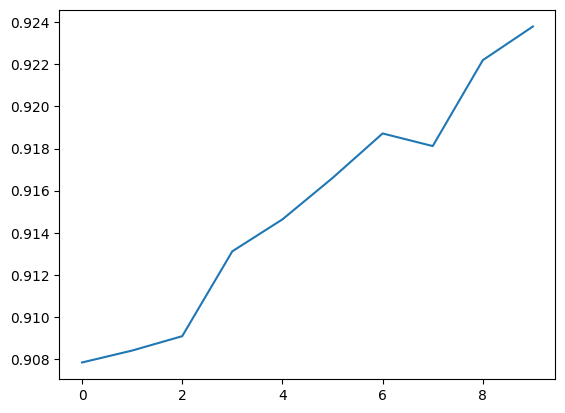

In [16]:
import matplotlib.pyplot as plt
plt.plot(histr.history['accuracy'])

as we can see the accuracy is still increasing and running more number of epochs will further increase it.